In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


<h1> Dataset Boston Housing </h1>

El dataset de *Boston Housing* está compuesto de 506 registros del censo de 1970.

Las variables que definen el problema son:

<dl>
  <dt><b>Crime Rate</b> (<i>crim</i>)</dt>
    <dd>Crimen per cápita por ciudad</dd>
  <dt><b>Residential Land Zones</b> (<i>zn</i>)</dt>
    <dd>Proporción de terrenos residenciales divididos en zonas para lotes de más de 25,000 pies cuadrados (aproximadamente 2322.576 m<sup>2</sup>)</dd>
  <dt><b>Non-retail Business Acres</b> (<i>indus</i>)</dt>
    <dd>Proporción de acres (0.40 ha) de negocios no minoristas por ciudad</dd>
  <dt><b>Charles River tract bounds</b> (<i>chas</i>)</dt>
    <dd>Variable ficticia de Charles River (= 1 si colinda con el río, 0 de lo contrario)</dd>
  <dt><b>N.O. Concentration</b> (<i>nox</i>)</dt>
    <dd>Concentración de óxidos nítricos (partes por 10 millones)</dd>
  <dt><b>No. of Rooms</b> (<i>rm</i>)</dt>
    <dd>Número promedio de habitaciones por vivienda</dd>
  <dt><b>Age</b> (<i>age</i>)</dt>
    <dd>Proporción de unidades ocupadas por sus propietarios construidas antes de 1940</dd>
  <dt><b>Distance to Employment</b> (<i>dis</i>)</dt>
    <dd>Distancias desproporcionadas a cinco centros de empleo de Boston</dd>
  <dt><b>Highway Accessibility</b> (<i>rad</i>)
    <dd>Índice de accesibilidad a las autopistas</dd>
  <dt><b>Property Tax Rate</b> (<i>tax</i>)
    <dd>Tasa de impuesto a la propiedad de valor completo por USD 10,000</dd>
  <dt><b>Pupil Teacher Ratio</b> (<i>ptratio</i>)</dt>
    <dd>Colegios por localidad</dd>
  <dt><b>B</b>
    <dd>Proporción de negros por ciudad</dd>
  <dt><b>% Lower Income</b> (<i>lstat</i>)
    <dd>Porcentaje de estado inferior de la población</dd>
  <dt><b>price</b><dt>
    <dd>Valor mediano de las viviendas ocupadas por sus propietarios en USD 1000</dd>
</dl>

<h2> Cargando el dataset Boston housing </h2>

In [2]:
# Se importa el dataset Boston housing
boston_housing = tf.keras.datasets.boston_housing

# Se cargan los conjuntos de entrenamiento (*_train_whole) y de validación (*_test) en variables separadas
(X_train_whole, y_train_whole), (X_test, y_test) = boston_housing.load_data()

In [3]:
# Impresión del número de muestras para el conjunto de entrenamiento y de validación

print(f'Número de muestras del conjunto de entrenamiento {X_train_whole.shape}')
print(f'Número de muestras del conjunto de prueba {X_test.shape}')

Número de muestras del conjunto de entrenamiento (404, 13)
Número de muestras del conjunto de prueba (102, 13)


### Se colocan los datos en un dataframe

In [4]:
import pandas as pd
import numpy as np

# Nombres de las variables
# Nombre largo
variables_boston_housing = ['Crime Rate', 'Residential Land Zones', 'Non-retail Business Acres', 'Charles River tract bounds', 'N.O. Concentration',
                '# of Rooms', 'Age', 'Distance to Employment', 'Highway Accessibility', 'Property Tax Rate', 'Pupil Teacher Ratio', 'B', '% Lower Income',
                'Housing value']
# Nombre corto
short_variables = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'B', 'lstat', 'price']

# Se inserta la variable independiente (y_train_whole) al final del las variables del problema
train_whole = np.insert(X_train_whole, -1, y_train_whole, axis=1)

# Se genera un dataframe con la información del conjunto de entrenamiento
df_train = pd.DataFrame(train_whole, columns = short_variables)

In [5]:
df_train.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,B,lstat,price
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,15.2,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,42.3,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,50.0,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,21.1,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,17.7,14.65


#### Valores nulos

En caso de existir valores nulos, las soluciones más comunes son:
1. Eliminar las muestras (filas) o características (columnas) que contengan valores nulos.
2. Reemplazar por un valor constante, tal como la media, mediana, moda, etc.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  B        404 non-null    float64
 12  lstat    404 non-null    float64
 13  price    404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [7]:
df_train.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
B          0
lstat      0
price      0
dtype: int64

<h3>Análisis de los datos</h3>

In [8]:
# Se calcula la información estadística, tal como media, desviación estándar, percentil, etc, de cada una de las columnas del dataframe
df_train.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,B,lstat,price
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,22.395050,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,9.210442,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,5.000000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,16.675000,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,20.750000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,24.800000,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,50.000000,37.970000


### Visualización

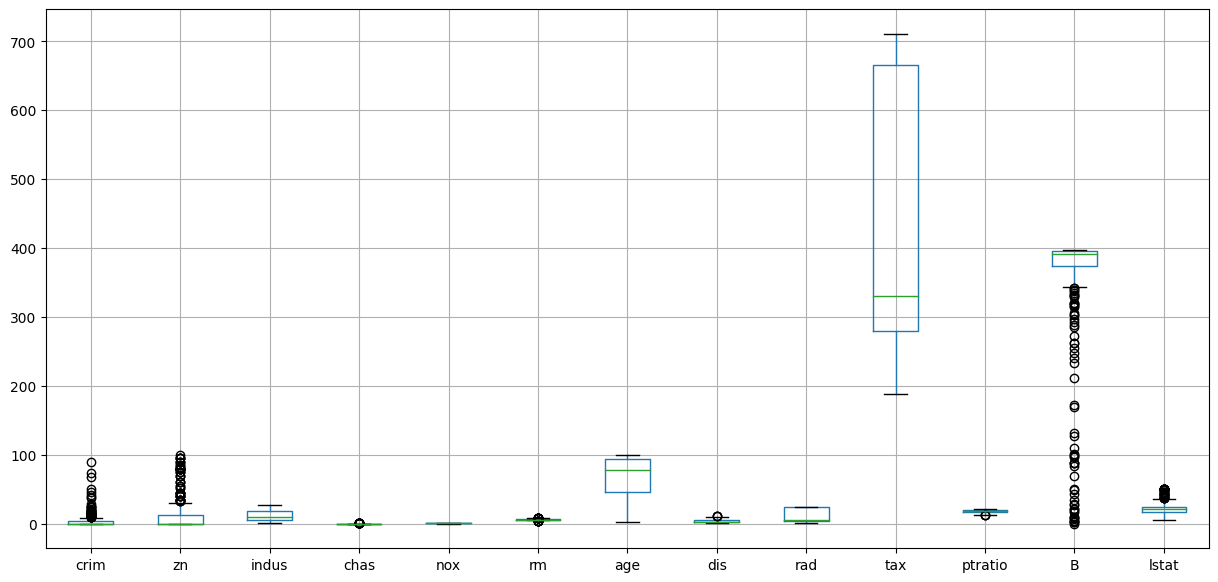

In [9]:

import seaborn as sb
import matplotlib.pyplot as plt

# Se grafican los diagramas de caja de cada una de las columnas del dataframe
boxplot = df_train[short_variables[:-1]].boxplot(figsize=(15,7))

plt.show()

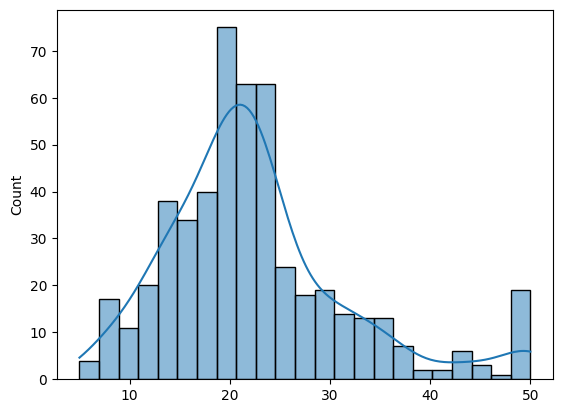

In [10]:
#
sb.histplot(np.concatenate((y_train_whole, y_test), axis=0), kde=True)
plt.show()

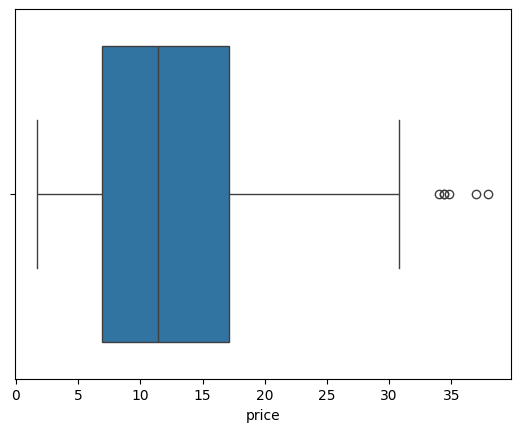

In [11]:
#
sb.boxplot(df_train["price"], orient='h')
plt.show()

### Correlación entre las variables

crim       0.434384
zn        -0.415237
indus      0.603129
chas      -0.011017
nox        0.592994
rm        -0.610844
age        0.590898
dis       -0.507075
rad        0.490250
tax        0.534752
ptratio    0.365873
B         -0.376081
lstat     -0.730793
price      1.000000
Name: price, dtype: float64


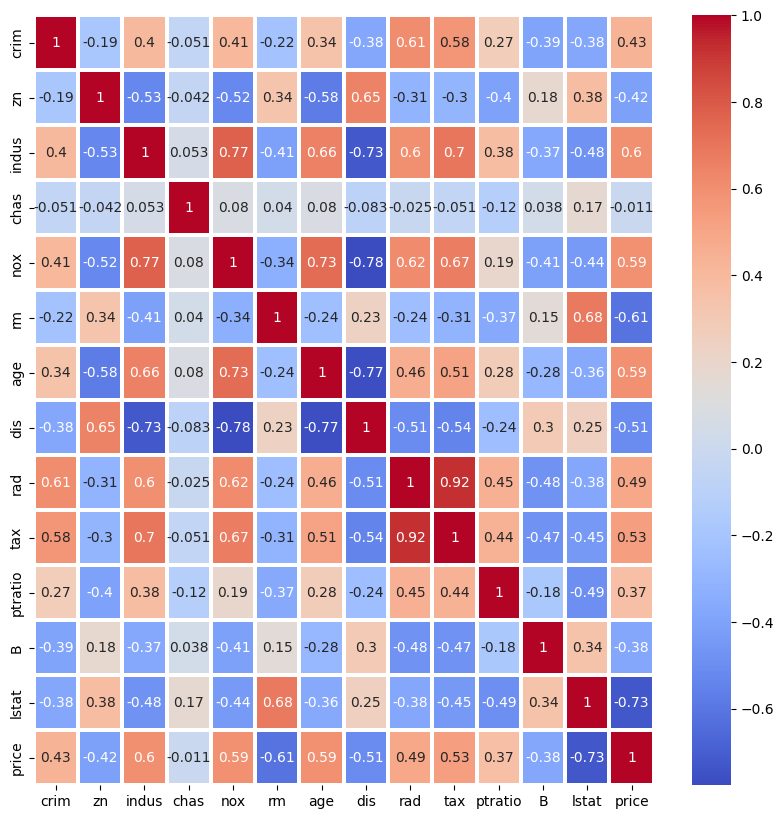

In [12]:
correlation = df_train.corr()
print(correlation.loc['price'])

# Se calcula la matriz de correlación por pares de columnas, excluyendo los valores nulos
fig = plt.figure(figsize=(10, 10))

matriz_corr = df_train.corr()
# Mapa de calor de la matriz de correlación
ax = sb.heatmap(matriz_corr, linewidths=1.5, linecolor='white',
                cmap='coolwarm', annot=True)
plt.show()

0
lstat
1
rm
2
ptratio


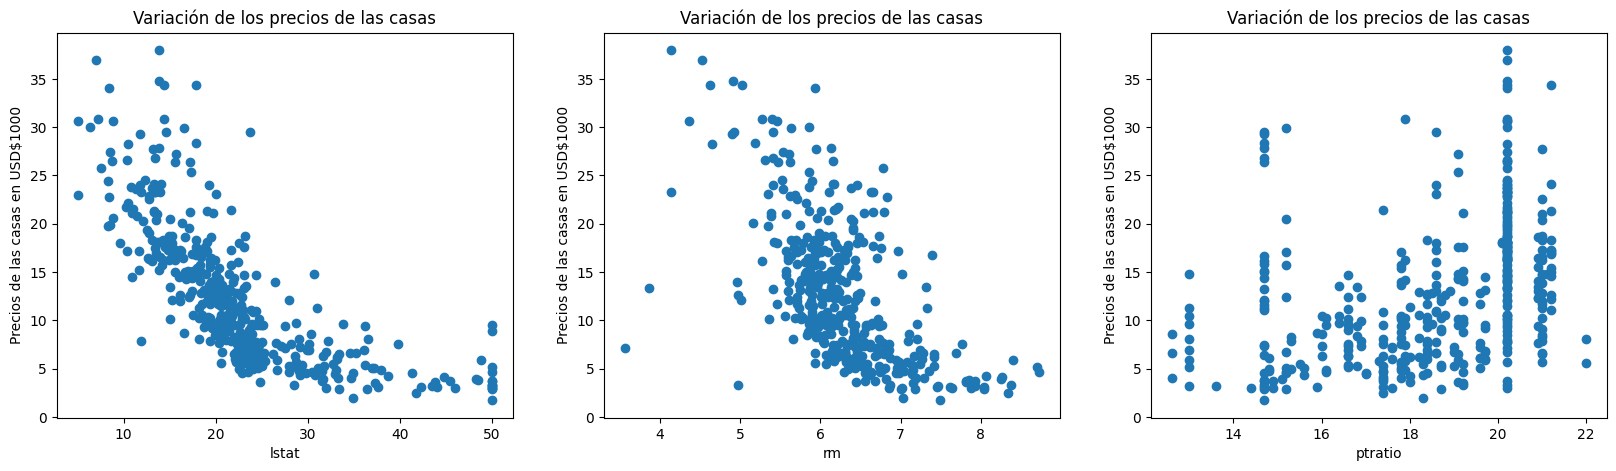

In [13]:
# Revisamos los aChecking the scatter plot with the most correlated features
plt.figure(figsize = (20,5))
features = ['lstat','rm','ptratio']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df_train[col]
    y = df_train.price
    print(i)
    print(col)
    plt.scatter(x, y, marker='o')
    plt.title("Variación de los precios de las casas")
    plt.xlabel(col)
    plt.ylabel("Precios de las casas en USD$1000")
plt.show()

## Dividir el dataset

In [14]:
from sklearn.model_selection import train_test_split

# Se divide el dataset en 3 partes:
# 1. Train (entrenamiento)
# 2. Validation (validacion)
# 3. Test (prueba)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_whole, y_train_whole, test_size = 0.2, random_state = 4)

## Normalización de datos

In [15]:
import numpy as np
from sklearn.preprocessing import normalize

Xtrain_norm = normalize(X_train_whole, axis=0)
Xvalid_norm = normalize(X_valid, axis=0)
X_test_norm = normalize(X_test, axis=0)

In [16]:
X_test_norm.shape

(102, 13)

## Entrenamiento de la red neuronal multicapa

### Definición del modelo

**Keras** es una librería que funciona sobre **Tensorflow** y permite definir modelos de manera sencilla.

**Modelo secuencial**<br>

Modelo que se compone de una pila de capas, donde cada capa tiene un tensor (arreglo) de entrada y un tensor de salida. Se usa

<center>
<b>keras.Sequential()</b>
</center>

para definir un modelo secuencial

La arquitectura del modelo va a contener la siguiente capa:
<dl>
  <dt><b>Dense</b></dt>
  <dd>Capa de neuronas densamente conectada<br>
     Argumentos:
     <ul>
      <li><b>units</b> Valor entero positivo e indica la dimensionalidad de salida
     <li><b>activation=None</b> Función de activación, por default "linear" (a(x)=x)
     </ul>
  </dd>
</dl>

https://keras.io/api/layers/core_layers/dense/

**Funciones de activación**<br>

<dl>
    <dt><b>relu</b></dt>
        <dd>Si X>0 devuelve X, si no, devuelve 0</dd>
    <dt><b>softmax</b></dt>
        <dd>Generalmente se emplea en la última capa de una red de clasificación (más de 2 clases), debido a que el resultado se puede interpretar como una distribución de probabilidad.</dd>
    <dt><b>sigmoid</b></dt>
        <dd>Función de activación sigmoide, la cual retorna valores entre 0 y 1. Además, esta función es equivalente softmax de dos clases (clasificación binaria)</dd>
</dl>

https://keras.io/api/layers/activations/

In [17]:
# Importando librerias para definir la arquitectura
import keras
from keras.layers import Dense
from keras.models import Sequential

In [18]:
# Definición del modelo
model = Sequential()

model.add(Dense(128, activation='relu', name="Input", input_dim =13))
model.add(Dense(64, activation='relu', name="Hidden_1"))
model.add(Dense(32, activation='relu', name="Hidden_2"))
model.add(Dense(16, activation='relu', name="Hidden_3"))
model.add(Dense(1, name="Output"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 128)               1792      
                                                                 
 Hidden_1 (Dense)            (None, 64)                8256      
                                                                 
 Hidden_2 (Dense)            (None, 32)                2080      
                                                                 
 Hidden_3 (Dense)            (None, 16)                528       
                                                                 
 Output (Dense)              (None, 1)                 17        
                                                                 
Total params: 12673 (49.50 KB)
Trainable params: 12673 (49.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


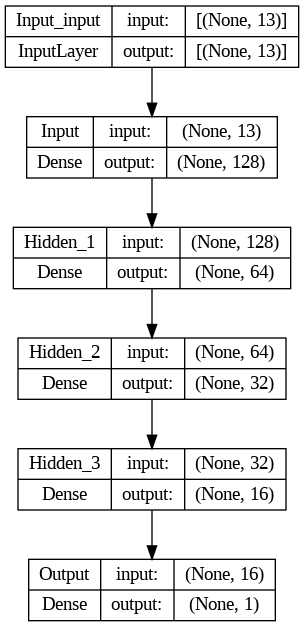

In [20]:
# !pip install pydot
tf.keras.utils.plot_model(model, to_file="prueba.png", show_shapes=True)

### Compilación del modelo

<center>
<b>model.compile</b>
</center>

Parámetros:

<dl>
    <dt><b>optimizer</b></dt>
        <dd>Algoritmo de optimización que se utiliza para entrenar la red. El descenso del gradiente estocástico (sgd) es un ejemplo de estos algoritmos.(https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)</dd>
    <dt><b>loss</b></dt>
        <dd>La función de pérdida se emplea para evaluar la red durante el entrenamiento y por lo tanto su valor se minimiza, un ejemplo es mean_absolute_error (https://www.tensorflow.org/api_docs/python/tf/keras/losses)</dd>
    <dt><b>metrics</b></dt>
        <dd>Métricas para la evaluación (desempeño) del modelo, después de que se entreno. Por ejemplo mse (https://www.tensorflow.org/api_docs/python/tf/keras/metrics)</dd>
</dl>

In [21]:
model.compile(
    optimizer = 'Adam',
    loss = 'mean_squared_error',
    metrics=['mae'] #'mse' o 'mape'
)

### Entrenamiento del modelo

<center>
    <b>model.fit</b>
</center>

Entrena el modelo durante un número de épocas (iteraciones en el dataset)

Parámetros

*   <b>epochs</b>. Número de epocas para entrenar el modelo
*   <b>validation_data</b>. Conjunto de datos que se emplean para evaluar la perdida al final de cada epoca.
*   <b>batch_size</b>. Número de muestras para actualización del gradiente
*   <b>verbose</b>. Salida del proceso de entrenamiento (0, 1, 2)


In [22]:
history = model.fit(
    Xtrain_norm, y_train_whole,
    epochs = 100,
    validation_data = (Xvalid_norm, y_valid),)
    #batch_size=10)

Epoch 1/100
13/13 [==============================] - 5s 58ms/step - loss: 581.0886 - mae: 22.2812 - val_loss: 618.5198 - val_mae: 22.8424
Epoch 2/100
13/13 [==============================] - 0s 13ms/step - loss: 559.7514 - mae: 21.7953 - val_loss: 567.5695 - val_mae: 21.6663
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 499.9466 - mae: 20.3480 - val_loss: 433.0650 - val_mae: 18.2229
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 357.8883 - mae: 16.3958 - val_loss: 198.8078 - val_mae: 10.7093
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 157.2480 - mae: 9.2259 - val_loss: 208.5384 - val_mae: 12.1700
Epoch 6/100
13/13 [==============================] - 0s 11ms/step - loss: 107.0061 - mae: 8.1062 - val_loss: 246.3094 - val_mae: 13.3705
Epoch 7/100
13/13 [==============================] - 0s 12ms/step - loss: 93.9449 - mae: 7.1757 - val_loss: 144.4678 - val_mae: 10.0642
Epoch 8/100
13/13 [======================

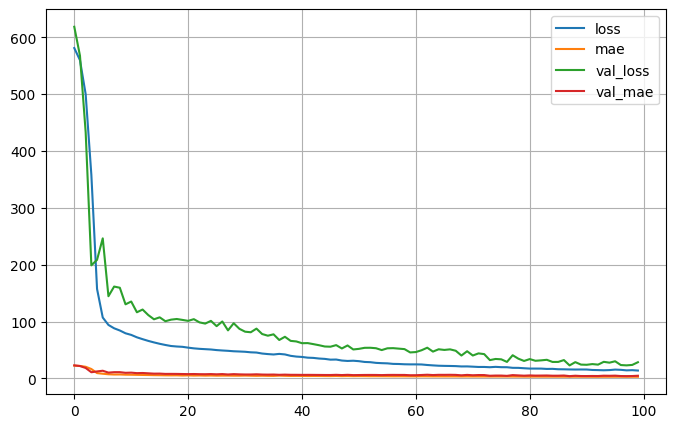

In [23]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()
plt.show()

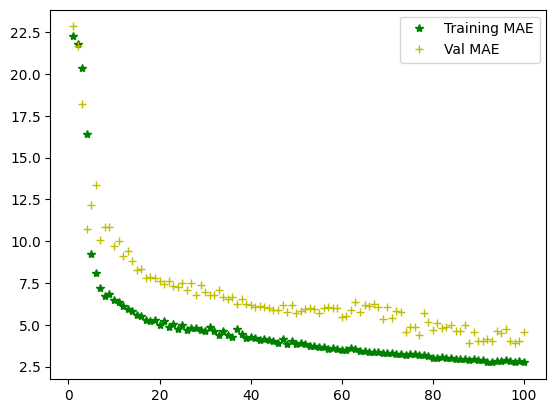

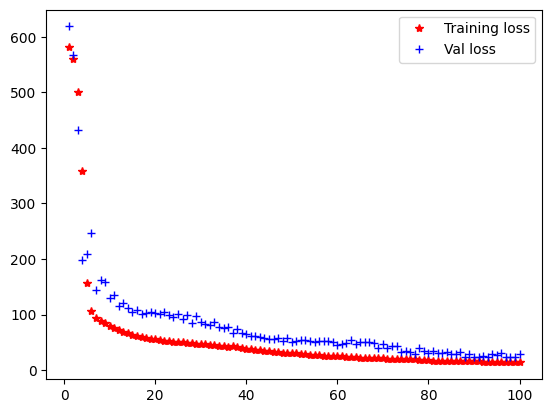

In [24]:
train_mse=model.evaluate(X_test, y_test, verbose=0)

loss = history.history['loss']
acc = history.history['mae']
val_loss = history.history['val_loss']
val_acc = history.history['val_mae']

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'g*', label='Training MAE')
plt.plot(epochs, val_acc, 'y+', label='Val MAE')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r*', label='Training loss')
plt.plot(epochs, val_loss, 'b+', label='Val loss')
plt.legend()
plt.show()

### Guardar modelo

<center>
    <b>model.save</b>
</center>
</br>
Guarda la arquitectura, pesos y configuración de entrenamiento del modelo. Los formatos pueden ser:

<ul>
    <li>HDF5: save_format='h5', nombre sin extensión
    <li>SavedModel: save_format='tf', nombre con extensión h5
    <li>Keras
</ul>
Mas información en: https://keras.io/api/saving/model_saving_and_loading/


In [25]:
model.save('number_model.h5', save_format='h5')
# model.save('number_model', save_format='tf')
# model.save('number_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Cargar modelo

In [26]:
from tensorflow.keras.models import load_model
saved_model = load_model('number_model.h5')

### Predicciones

<center>
    <b>model.predit</b>
</center>
</br>
Retorna las predicciones del conjunto de datos de entrada.


4/4 [==============================] - 0s 3ms/step


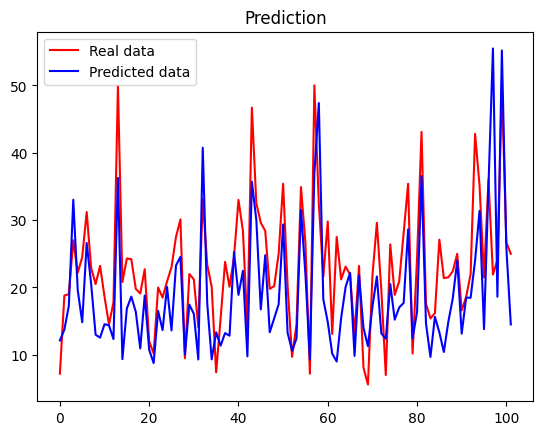

In [27]:
y_pred = saved_model.predict(X_test_norm)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.27566681997800946
